In [1]:
import numpy as np
import pandas as pd
import re

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('emotion_sentimen_dataset.csv', encoding='utf-8')

In [3]:
data.head()

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral


In [4]:
data.tail()

,Unnamed: 0,text,Emotion
839550,839550,i feel like telling these horny devils to find...,neutral
839551,839551,i began to realize that when i was feeling agi...,neutral
839552,839552,i feel very curious be why previous early dawn...,neutral
839553,839553,i feel that becuase of the tyranical nature of...,neutral
839554,839554,i think that after i had spent some time inves...,neutral


In [5]:
data.columns

Index(['Unnamed: 0', 'text', 'Emotion'], dtype='object')

In [6]:
del data['Unnamed: 0']

In [7]:
data.head()

,text,Emotion
0,i seriously hate one subject to death but now ...,hate
1,im so full of life i feel appalled,neutral
2,i sit here to write i start to dig out my feel...,neutral
3,ive been really angry with r and i feel like a...,anger
4,i feel suspicious if there is no one outside l...,neutral


In [8]:
data.isnull().any()

text       False
Emotion    False
dtype: bool

In [9]:
data.isnull().sum()

text       0
Emotion    0
dtype: int64

In [10]:
data.describe()

,text,Emotion
count,839555,839555
unique,393822,13
top,i feel more adventurous willing to take risks,neutral
freq,32,674538


In [11]:
data['Emotion'].value_counts()

neutral       674538
love           39553
happiness      27175
sadness        17481
relief         16729
hate           15267
anger          12336
fun            10075
enthusiasm      9304
surprise        6954
empty           5542
worry           4475
boredom          126
Name: Emotion, dtype: int64

In [12]:
data.shape

(839555, 2)

In [13]:
data['Emotion'].unique()

array(['hate', 'neutral', 'anger', 'love', 'worry', 'relief', 'happiness',
       'fun', 'empty', 'enthusiasm', 'sadness', 'surprise', 'boredom'],
      dtype=object)

In [14]:
cnt=3
for i in range(len(data['Emotion'])):
    if data['Emotion'][i]=='anger':
        print(data['text'][i])
        if cnt==0:
            break
        cnt-=1

ive been really angry with r and i feel like an idiot for trusting him in the first place
i looked at what had happened to us in two generations and looked at what hadn t happened to them in two or three and instead of feeling outraged by their history of aggression i felt privileged by it
i feel morally outraged and furious more often than i d like
i also hope you understand why i feel so angry with you when you dont support the hat rule or when you turn up at a school event sans hat yourself


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

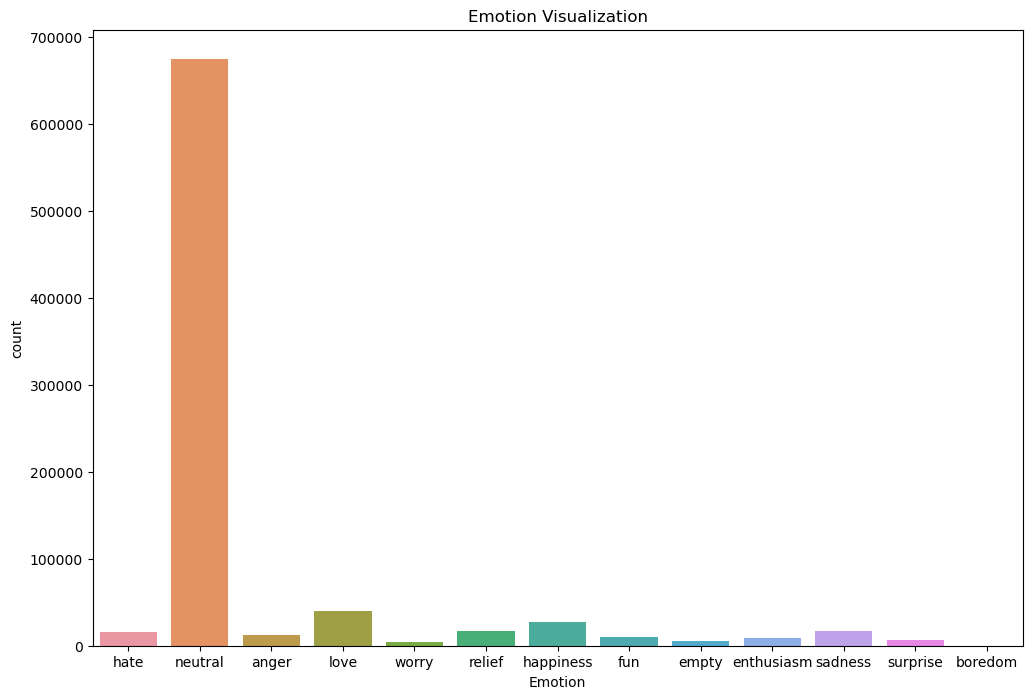

In [16]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Emotion', data=data)
plt.title('Emotion Visualization')
plt.show()

In [17]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [18]:
# Import data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize

In [19]:
!pip install toktok

In [20]:
!pip install spacy

In [21]:
!pip install textblob

In [22]:
import spacy
import re
import string
import unicodedata
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from bs4 import BeautifulSoup

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aviga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
from nltk.corpus.reader.tagged import ToktokTokenizer
tokenizers = ToktokTokenizer()
stopwords = nltk.corpus.stopwords.words('english')

In [25]:
def noiseremovel_text(text):
  soup = BeautifulSoup(text, "html.parser")
  text = soup.get_text()
  text = re.sub('\[[^]]*\]', '',text)
  return text

In [26]:
data['text'] = data['text'].apply(noiseremovel_text)

In [27]:
data.head()

,text,Emotion
0,i seriously hate one subject to death but now ...,hate
1,im so full of life i feel appalled,neutral
2,i sit here to write i start to dig out my feel...,neutral
3,ive been really angry with r and i feel like a...,anger
4,i feel suspicious if there is no one outside l...,neutral


In [28]:
def stemmer(text):
  ps = nltk.porter.PorterStemmer()
  text = '.'.join([ps.stem(word) for word in text.split()])
  return text

In [29]:
data['text'] = data['text'].apply(stemmer)

In [30]:
data.head()

,text,Emotion
0,i.serious.hate.one.subject.to.death.but.now.i....,hate
1,im.so.full.of.life.i.feel.appal,neutral
2,i.sit.here.to.write.i.start.to.dig.out.my.feel...,neutral
3,ive.been.realli.angri.with.r.and.i.feel.like.a...,anger
4,i.feel.suspici.if.there.is.no.one.outsid.like....,neutral


In [31]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer

# Assuming you have a DataFrame named 'df' with a column 'review'

# Download the necessary data
nltk.download('punkt')
nltk.download('stopwords')

# Function to remove stopwords from text
def remove_stopwords(text, stop_words=None, is_lower_case=False):
    # Create a ToktokTokenizer instance
    tokenizers = ToktokTokenizer()

    # Use a regular expression to split the text into words while preserving consecutive full-stop signs
    words = re.findall(r'\w+|\.\.+', text)

    # Remove stopwords
    if stop_words is None:
        stop_words = set()
    else:
        stop_words = set(stop_words)

    if is_lower_case:
        # Remove stopwords without converting tokens to lowercase
        filtokens = [i for i in words if i not in stop_words]
    else:
        # Remove stopwords after converting tokens to lowercase
        filtokens = [i for i in words if i.lower() not in stop_words]

    # Join the filtered words back into a sentence
    filtered_text = ' '.join(filtokens)
    return filtered_text

# Now, apply the remove_stopwords function to the 'review' column of the DataFrame

# Get the English stopwords
stop_wr = set(stopwords.words('english'))

# Apply the remove_stopwords function to the 'review' column of the DataFrame
data['text'] = data['text'].apply(remove_stopwords, stop_words=stop_wr)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aviga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aviga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
data.head()

,text,Emotion
0,serious hate one subject death feel reluct drop,hate
1,im full life feel appal,neutral
2,sit write start dig feel think afraid accept p...,neutral
3,ive realli angri r feel like idiot trust first...,anger
4,feel suspici one outsid like raptur ha happen ...,neutral


In [33]:
X = data.text[:629665]
y = data.text[629665:]

In [34]:
cv = CountVectorizer(min_df=0.0,max_df=1.0,binary=False,ngram_range=(1,3))
cv_train = cv.fit_transform(X)
cv_test = cv.fit_transform(y)
print('Bow_cv_train',cv_train.shape)
print('Bow_cv_test',cv_test.shape)

Bow_cv_train (629665, 3665532)
Bow_cv_test (209890, 2082566)


In [35]:
tf = TfidfVectorizer(min_df=0.0,max_df=1.0,binary=False,ngram_range=(1,3))
tf_train = tf.fit_transform(X)
tf_test = tf.fit_transform(y)
print('Bow_tf_train',tf_train.shape)
print('Bow_tf_test',tf_test.shape)

Bow_tf_train (629665, 3665532)
Bow_tf_test (209890, 2082566)


In [36]:
# Create a LabelBinarizer instance
label_binarizer = LabelBinarizer()

# Fit and transform the 'sentiment' column
emotion_encoded = label_binarizer.fit_transform(data['Emotion'])
print(emotion_encoded.shape)

(839555, 13)


In [37]:
emotion_encoded

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Convert the text data to bag-of-words features
X_bow = vectorizer.fit_transform(data['text'])

# Split the data into features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X_bow, data['Emotion'], test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic = LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=42)

# Fitting the model on the training data
lr_bow = logistic.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_bow.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9903937204828749
Classification Report:
              precision    recall  f1-score   support

       anger       0.98      0.99      0.98      2489
     boredom       1.00      0.95      0.98        21
       empty       0.97      0.99      0.98      1096
  enthusiasm       0.94      0.98      0.96      1839
         fun       0.95      0.95      0.95      1977
   happiness       0.96      0.97      0.97      5370
        hate       0.98      0.99      0.99      3018
        love       0.94      0.98      0.96      8001
     neutral       1.00      0.99      1.00    134999
      relief       0.99      0.99      0.99      3396
     sadness       0.98      0.98      0.98      3428
    surprise       0.99      0.99      0.99      1372
       worry       0.92      0.93      0.93       905

    accuracy                           0.99    167911
   macro avg       0.97      0.98      0.97    167911
weighted avg       0.99      0.99      0.99    167911



In [39]:
# Make predictions on new text data
new_text = ["I'm relief"]
new_text_bow = vectorizer.transform(new_text)
y_pred = lr_bow.predict(new_text_bow)

print("Predicted Sentiment:", y_pred[0])

Predicted Sentiment: relief


In [40]:
import pickle

# Save the trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(lr_bow, file)

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)